# PHÂN BIỆT TUYẾN TÍNH LDA 

## Đọc và chuẩn hóa dữ liệu 

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../../data/data_processed/data_processed.csv")

X = df.drop("NSP", axis=1)
y = df["NSP"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Giảm chiều LDA  xuống hai thành phần 

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

## Trực quan hóa 

In [14]:
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df.describe()

,LD1,LD2
count,2.126000e+03,2.126000e+03
mean,3.876903e-16,2.673726e-16
std,1.643238e+00,1.165169e+00
min,-2.995003e+00,-2.629396e+00
25%,-1.049082e+00,-8.578041e-01
50%,-4.878223e-01,2.764145e-02
75%,5.094328e-01,7.174235e-01
max,8.685769e+00,3.761138e+00


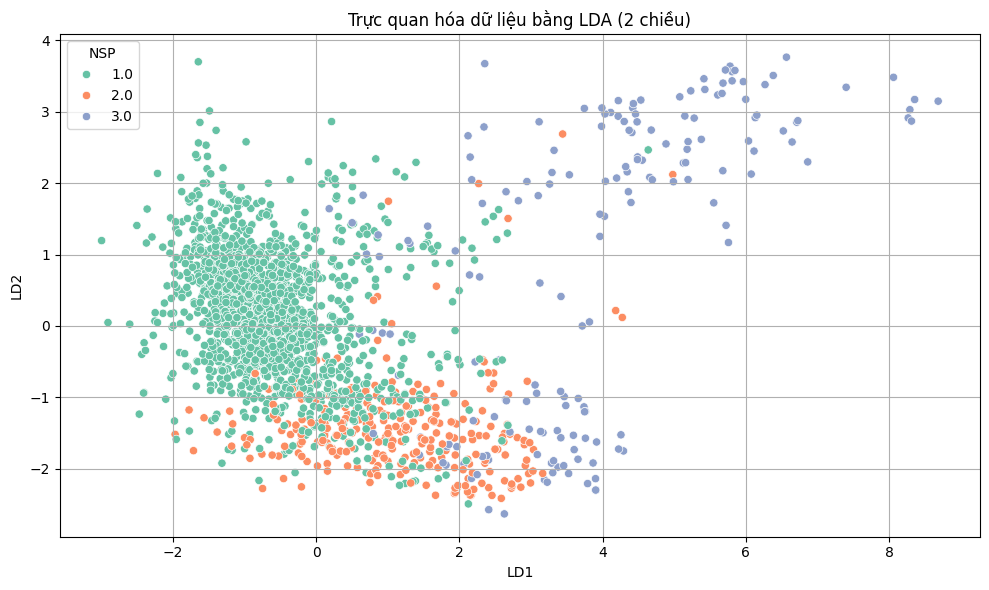

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['NSP'] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='NSP', palette='Set2')
plt.title("Trực quan hóa dữ liệu bằng LDA (2 chiều)")
plt.legend(title='NSP')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_18508\1281664760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='NSP', y='LD1', data=lda_df, palette='Set2', jitter=True, size=5, alpha=0.7)


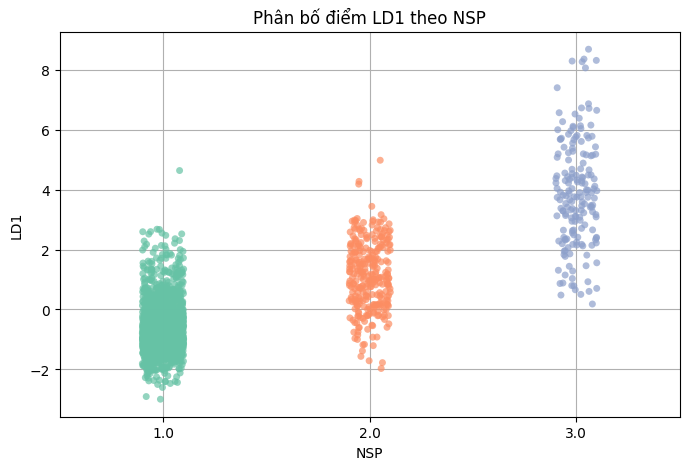

In [16]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='NSP', y='LD1', data=lda_df, palette='Set2', jitter=True, size=5, alpha=0.7)
plt.title("Phân bố điểm LD1 theo NSP")
plt.xlabel("NSP")
plt.ylabel("LD1")
plt.grid(True)
plt.show()

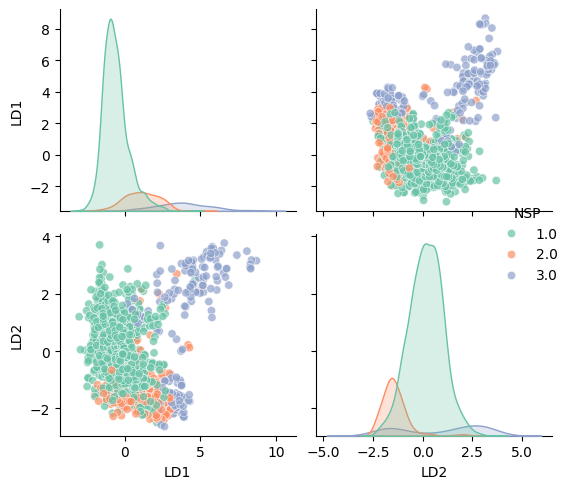

In [22]:
# Vẽ pairplot cho LDA
sns.pairplot(lda_df, hue='NSP', palette='Set2', plot_kws={'alpha': 0.7})

plt.tight_layout()
plt.show()

## Xác định lượng thông tin bảo tồn 

In [18]:
explained_variance_ratio = lda.explained_variance_ratio_
print(f"Phương sai giải thích bởi từng thành phần: {explained_variance_ratio}")

Phương sai giải thích bởi từng thành phần: [0.82591875 0.17408125]


## Giảm chiều dữ liệu theo LDA 

In [19]:
X_lda_all = lda.fit_transform(X_scaled, y)

# Tạo DataFrame
lda_df_all = pd.DataFrame(X_lda_all, columns=["LD1", "LD2"])
lda_df_all["NSP"] = y.values
lda_df_all.to_csv("../../data/dimension_reduction/lda/lda_all.csv", index=False)

## Chia dữ liệu train-test theo tỷ lệ 4:1, 7:3, 6:4 giảm chiều trên tập train rồi chiếu trên tập test 

In [20]:
from sklearn.model_selection import train_test_split

def split_and_lda(X_scaled, y, test_size, n_components=2):
    # Chia dữ liệu train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    # Huấn luyện LDA trên tập train
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)

    # Chiếu tập test theo các thành phần LDA đã học từ train
    X_test_lda = lda.transform(X_test)

    # Tạo DataFrame kèm nhãn
    df_train = pd.DataFrame(X_train_lda, columns=["LD1", "LD2"])
    df_train["NSP"] = y_train.values

    df_test = pd.DataFrame(X_test_lda, columns=["LD1", "LD2"])
    df_test["NSP"] = y_test.values

    return df_train, df_test


In [21]:
# 4:1
train_80, test_20 = split_and_lda(X_scaled, y, test_size=0.2)
train_80.to_csv("../../data/dimension_reduction/lda/train_80.csv")
test_20.to_csv("../../data/dimension_reduction/lda/test_20.csv")

# 7:3
train_70, test_30 = split_and_lda(X_scaled, y, test_size=0.3)
train_70.to_csv("../../data/dimension_reduction/lda/train_70.csv")
test_30.to_csv("../../data/dimension_reduction/lda/test_30.csv")

# 6:4
train_60, test_40 = split_and_lda(X_scaled, y, test_size=0.4)
train_60.to_csv("../../data/dimension_reduction/lda/train_60.csv")
test_40.to_csv("../../data/dimension_reduction/lda/test_40.csv")